# Load in counts table & name samples

In [1]:
#a<-read.csv('Samples_Report_052021_exclusive.csv',header=T, stringsAsFactors=F) #exclusive spectral counts
#a<-read.table('table.tab',header=T, stringsAsFactors=F,sep=' ') #raw counts
a<-read.table('TPM_table.tab',header=T, stringsAsFactors=F,sep=' ') #TPM counts
#a<-read.table('copiesperL.tab',header=T, stringsAsFactors=F,sep=' ') #copies per L
#a<-read.table('/vortexfs1/omics/saito/BATS2019-clio-metaT/eukrhythmic_output/salmon_mega_merge/raw_individual/table.tab',header=T,stringsAsFactors=F,sep=' ') #raw counts, reads mapped to full assembly

In [2]:
rownames(a)<-a$Name #for TPM_table.tab and table.tab and exclusive counts
#rownames(a)<-a$X #For copiesperL.tab
a<-a[,-1]

In [3]:
flip<-as.data.frame(t(a))

In [4]:
flip$X<-rownames(flip)

In [5]:
b<-read.csv('id.csv',header=T)

In [6]:
cts<-merge(flip, b, by='X') #for transcripts
#cts<-merge(flip, b, by='X',all=T) #for proteins
#c[is.na(c)] <- 0 #for proteins

In [7]:
rownames(cts)<-cts$label

In [8]:
cts<-cts[,-1]

In [9]:
cts<-cts[,-11044286] #Get rid of text columns (x6) in cds mapped reads table
cts<-cts[,-11044286]
cts<-cts[,-11044286]
cts<-cts[,-11044286]
cts<-cts[,-11044286]
cts<-cts[-45,]
cts<-cts[-45,]

#cts<-cts[,-43211818] #Get rid of text collumns in full transcripts mapped reads table
#cts<-cts[,-43211818]
#cts<-cts[,-43211818]
#cts<-cts[,-43211818]
#cts<-cts[,-43211818]


In [10]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [11]:
cts1<-as.data.frame(t(cts), stringsAsFactors=F)
#cts1<-t(cts)
#cts2<-as.data.frame(cts1, stringsAsFactors=F, header=T)
#cts3<-as.numeric(as.character(cts2))
#cts1<-mutate_all(t(cts), function(x) as.numeric(as.character(x)))


In [12]:
cts1$X<-rownames(cts1)

In [13]:
options(repr.matrix.max.cols=80, repr.matrix.max.rows=80)

# Load in annotation table and make stacked bar plots

In [14]:
library(caroline)
tax<-read.tab('newtaxa.eukprot.merged.fasta.transdecoder-estimated-taxonomy.out',header=T,stringsAsFactors=F,sep='\t')

aa<-tax[order(tax$transcript_name, (tax$max_pid)), ] 
bb<-aa[ !duplicated(aa$transcript_name), ] #Remove duplicates..

tax<-bb

rownames(tax)<-tax$transcript_name

library(stringr)
library(tidyr)
tax<- tax %>%
  separate(full_classification, c("domain","supergroup", "division","class","order","family","genus","species"), ";")





Warning message:
“Expected 8 pieces. Missing pieces filled with `NA` in 7329870 rows [1, 2, 3, 4,
5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


In [15]:
nrow(tax)

[1] 7329870

In [16]:
cts1$transcript_name<-rownames(cts1)

In [17]:
merge<-merge(cts1, tax, by='transcript_name') 

# network analysis with igraph

In [18]:
egg<-read.delim('eggnog.emapper.annotations',sep="\t",header=F)
egg<-egg[-1,]
egg<-egg[-1,]
egg<-egg[-1,]
egg<-egg[-1,]
colnames(egg)<-c('transcript_name','seed_ortholog','evalue','score','eggNOG_OG', 'narr_OG_name', 'narrOG_cat','narr_OG_desc','best_OG_names','best_OG_cat','best_OG_desc','Preferred_name','GOs','EC','KEGG_ko','KAGG_pathway','KEGG_Module','KEGG_Reaction','KEGG_rclass','BRITE','KEGG_TC','CAZy','BiGG_Reaction','PFAMs')
egg<-egg[-1,]
#head(egg)
sub<-merge(egg, merge, by='transcript_name')
subset<-subset(sub, select = c('transcript_name','class','KEGG_ko','domain','division'))
subset[,6:51]<-sub[,25:70]

library(caroline)
key<-read.tab('rest.kegg.jp.txt')
colnames(key)<-c('KEGG_ko','def')
test<-subset #subset=file with taxonomy (class),KEGG_ko, counts, see below heatmap section
test1<-test[!grepl('-',test$KEGG_ko),] #Get rid of rows with KEGG_kos  "-" 
subset<-test1
library(tidyr)
library(dplyr)
subset1<-subset %>% 
    mutate(KEGG_ko = strsplit(as.character(KEGG_ko), ",")) %>% 
    unnest(KEGG_ko) #Send counts to all KOs listed

#Subset euks
x<-subset1
euk<-c('Eukaryota')
x<-x[x$domain %in% euk,]

In [19]:
x<-subset1
euk<-c('Eukaryota')
x<-x[x$domain %in% euk,]

In [20]:
x<-x[,-1]
x<-x[,-3]
x<-x[,-1]
head(x)

KEGG_ko   division    1_30_0.2 1_115_3 1_200 1_400 1_800 2_20 2_120 2_200
1 ko:K00485  Haptophyta 0.375023 0       0     0     0     0    0     0    
2 ko:K10408  Haptophyta 0.083842 0       0     0     0     0    0     0    
3 ko:K05692 NA          0.233233 0       0     0     0     0    0     0    
4 ko:K03283 NA          0.000000 0       0     0     0     0    0     0    
5 ko:K09490 NA          0.000000 0       0     0     0     0    0     0    
6 ko:K04300  Dinophyta  0.425377 0       0     0     0     0    0     0    
  2_400 2_800 3_20 1_115_0.2 6_4100 3_200 5_100 6_2000 8_40 8_600 3_800   
1 0     0     0    0         0      0     0     0      0    0     0.000000
2 0     0     0    0         0      0     0     0      0    0     0.000000
3 0     0     0    0         0      0     0     0      0    0     0.000000
4 0     0     0    0         0      0     0     0      0    0     0.000000
5 0     0     0    0         0      0     0     0      0    0     0.000000
6 0     0     0    0         0      0     0     0      0    0     0.019485
  1_30_3 3_120 7_20 6_400 6_800 6_1000 6_3000 6_4000 7_108 7_500 7_700 8_120
1 0      0     0    0     0     0      0      0      0     0     0     0    
2 0      0     0    0     0     0      0      0      0     0     0     0    
3 0      0     0    0     0     0      0      0      0     0     0     0    
4 0      0     0    0     0     0      0      0      0     0     0     0    
5 0      0     0    0     0     0      0      0      0     0     0     0    
6 0      0     0    0     0     0      0      0      0     0     0     0    
  8_175 8_250 3_400 3_600 3_700 3_1000 5_20 5_200 5_400 5_880 6_20 6_110 6_200
1 0     0     0     0     0     0      0    0     0     0     0    0     0    
2 0     0     0     0     0     0      0    0     0     0     0    0     0    
3 0     0     0     0     0     0      0    0     0     0     0    0     0    
4 0     0     0     0     0     0      0    0     0     0     0    0     0    
5 0     0     0     0     0     0      0    0     0     0     0    0     0    
6 0     0     0     0     0     0      0    0     0     0     0    0     0    
  X.x                          X.y
1 megahit_HN001_k141_100035.p1 0  
2 megahit_HN001_k141_100044.p2 0  
3 megahit_HN001_k141_10006.p1  0  
4 megahit_HN001_k141_100070.p2 0  
5 megahit_HN001_k141_100070.p2 0  
6 megahit_HN001_k141_100089.p1 0

In [21]:
x<-x[,-47]
x<-x[,-47]

In [22]:
tail(x)

KEGG_ko   division   1_30_0.2 1_115_3 1_200 1_400 1_800 2_20 2_120 2_200
1 ko:K06124  Dinophyta 0        0       0     0     0     0    0     0    
2 ko:K13248  Dinophyta 0        0       0     0     0     0    0     0    
3 ko:K08057 NA         0        0       0     0     0     0    0     0    
4 ko:K10098 NA         0        0       0     0     0     0    0     0    
5 ko:K03231 NA         0        0       0     0     0     0    0     0    
6 ko:K13199 NA         0        0       0     0     0     0    0     0    
  2_400 2_800 3_20 1_115_0.2 6_4100 3_200 5_100 6_2000 8_40 8_600 3_800 1_30_3
1 0     0     0    0         0      0     0     0      0    0     0     0     
2 0     0     0    0         0      0     0     0      0    0     0     0     
3 0     0     0    0         0      0     0     0      0    0     0     0     
4 0     0     0    0         0      0     0     0      0    0     0     0     
5 0     0     0    0         0      0     0     0      0    0     0     0     
6 0     0     0    0         0      0     0     0      0    0     0     0     
  3_120 7_20 6_400 6_800 6_1000 6_3000 6_4000 7_108 7_500 7_700 8_120 8_175
1 0     0    0     0     0      0      0      0     0     0     0     0    
2 0     0    0     0     0      0      0      0     0     0     0     0    
3 0     0    0     0     0      0      0      0     0     0     0     0    
4 0     0    0     0     0      0      0      0     0     0     0     0    
5 0     0    0     0     0      0      0      0     0     0     0     0    
6 0     0    0     0     0      0      0      0     0     0     0     0    
  8_250 3_400 3_600 3_700 3_1000 5_20 5_200 5_400 5_880 6_20 6_110    6_200
1 0     0     0     0     0      0    0     0     0     0    0.000000 0    
2 0     0     0     0     0      0    0     0     0     0    0.000000 0    
3 0     0     0     0     0      0    0     0     0     0    0.000000 0    
4 0     0     0     0     0      0    0     0     0     0    0.000000 0    
5 0     0     0     0     0      0    0     0     0     0    0.055182 0    
6 0     0     0     0     0      0    0     0     0     0    0.055182 0

In [23]:
library(dplyr)
d <- x %>%
    group_by(division,KEGG_ko) %>% summarise_all(funs(sum))

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


In [24]:
head(d)

division     KEGG_ko   1_30_0.2 1_115_3 1_200 1_400    1_800 2_20 2_120 2_200
1  Alveolata_X ko:K00422 0.468055 0       0     0.000000 0     0    0     0    
2  Alveolata_X ko:K00505 0.468055 0       0     0.000000 0     0    0     0    
3  Alveolata_X ko:K00870 0.000000 0       0     3.701175 0     0    0     0    
4  Alveolata_X ko:K01507 0.000000 0       0     0.000000 0     0    0     0    
5  Alveolata_X ko:K02873 0.000000 0       0     0.000000 0     0    0     0    
6  Alveolata_X ko:K03174 0.000000 0       0     0.000000 0     0    0     0    
  2_400 2_800 3_20     1_115_0.2 6_4100 3_200 5_100 6_2000 8_40 8_600 3_800
1 0     0     0.238404 0         0      0     0     0      0    0     0    
2 0     0     0.238404 0         0      0     0     0      0    0     0    
3 0     0     0.000000 0         0      0     0     0      0    0     0    
4 0     0     0.000000 0         0      0     0     0      0    0     0    
5 0     0     0.000000 0         0      0     0     0      0    0     0    
6 0     0     0.000000 0         0      0     0     0      0    0     0    
  1_30_3 3_120 7_20 6_400 6_800 6_1000 6_3000   6_4000 7_108 7_500    7_700
1 0      0     0    0     0     0      0.000000 0      0     0.000000 0    
2 0      0     0    0     0     0      0.000000 0      0     0.000000 0    
3 0      0     0    0     0     0      0.000000 0      0     0.000000 0    
4 0      0     0    0     0     0      0.000000 0      0     0.000000 0    
5 0      0     0    0     0     0      6.799266 0      0     0.000000 0    
6 0      0     0    0     0     0      0.000000 0      0     0.077519 0    
  8_120 8_175 8_250 3_400 3_600 3_700 3_1000 5_20 5_200 5_400 5_880   6_20
1 0     0     0     0     0     0     0      0    0     0     0.00000 0   
2 0     0     0     0     0     0     0      0    0     0     0.00000 0   
3 0     0     0     0     0     0     0      0    0     0     0.00000 0   
4 0     0     0     0     0     0     0      0    0     0     0.97211 0   
5 0     0     0     0     0     0     0      0    0     0     0.00000 0   
6 0     0     0     0     0     0     0      0    0     0     0.00000 0   
  6_110 6_200
1 0     0    
2 0     0    
3 0     0    
4 0     0    
5 0     0    
6 0     0

In [25]:
d$ID<-paste(d$division, d$KEGG_ko, sep='_')

In [26]:
d<-as.data.frame(d)
rownames(d)<-d$ID

In [27]:
d<-d[,-47]
d<-d[,-1]
d<-d[,-1]

In [28]:
keep<-d[rowSums(d) > 10, colSums(d) > 0]

In [29]:
nrow(keep)

[1] 25420

In [30]:
o<-log2(keep+1)

In [31]:
d<-o

In [32]:
nrow(d)

[1] 25420

In [33]:
#write.csv(d,'for_igraph_log2_transcripts_phyla_ko.csv')

In [34]:
library(igraph)


Attaching package: ‘igraph’


The following object is masked from ‘package:tidyr’:

    crossing


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [35]:
#from https://www.biostars.org/p/285296/
g <- graph.adjacency(
  as.matrix(as.dist(cor(t(d), method="spearman"))),
  mode="undirected",
  weighted=TRUE,
  diag=FALSE
)

In [36]:
g

IGRAPH 640fa97 UNW- 25420 323017936 -- 
+ attr: name (v/c), weight (e/n)
+ edges from 640fa97 (vertex names):
 [1]  Ancoracysta_ko:K02261-- Aphelida_ko:K19882   
 [2]  Ancoracysta_ko:K02261-- Apicomplexa_ko:K00012
 [3]  Ancoracysta_ko:K02261-- Apicomplexa_ko:K00024
 [4]  Ancoracysta_ko:K02261-- Apicomplexa_ko:K00025
 [5]  Ancoracysta_ko:K02261-- Apicomplexa_ko:K00026
 [6]  Ancoracysta_ko:K02261-- Apicomplexa_ko:K00297
 [7]  Ancoracysta_ko:K02261-- Apicomplexa_ko:K01174
 [8]  Ancoracysta_ko:K02261-- Apicomplexa_ko:K01412
+ ... omitted several edges

In [37]:
g <- simplify(g, remove.multiple=TRUE, remove.loops=TRUE)

# Colour negative correlation edges as blue
E(g)[which(E(g)$weight<0)]$color <- "#000000"

# Colour positive correlation edges as red
E(g)[which(E(g)$weight>0)]$color <- "#ed1162"




In [38]:
# Convert edge weights to absolute values
E(g)$weight <- abs(E(g)$weight)
g <- delete_edges(g, E(g)[which(E(g)$weight<0.65)])

# Remove any vertices remaining that have no edges
g <- delete.vertices(g, degree(g)==0)

In [39]:
# Change colour of vertex frames
V(g)$vertex.frame.color <- "black"

# Amplify or decrease the width of the edges
edgeweights <- E(g)$weight * 10.0

# Convert the graph adjacency object into a minimum spanning tree based on Prim's algorithm
mst <- mst(g, algorithm="prim")


In [40]:
library(stringr)

In [41]:
mst.nodes <- as.data.frame(vertex.attributes(g), stringsAsFactors=FALSE)
mst.nodes$taxa<-str_extract(mst.nodes$name, "([^_]*)")
mst.nodes$ko<-str_extract(mst.nodes$name, "(_.*)")
mst.nodes$ko<-str_remove_all(mst.nodes$ko,"_")
mst.nodes$ko<-gsub("X","",as.character(mst.nodes$ko))
cols <- c(' Chlorophyta'='#80ff80', ' Ciliophora'='#c44dff', ' Collodictyonidae'='#ccccff', ' Cryptophyta'='#cc0044', ' Dinophyta'='#0052cc', ' Discoba'='#ffd9b3',' Foraminifera'='#669999',' Fungi'='#FFE6FF',' Haptophyta'='#FFE74A', ' Lobosa'='#000000',' Marine_stramenopiles_MASTs group'='#9c7b11',' Metazoa'='#1affff',' Picozoa'='#fc8123',' Radiolaria'='#942649',' Stramenopiles'='#ff9999',' Ancyromonadidae'='#dddddd', ' Apicomplexa'='#dddddd',' Centroplasthelida'='#dddddd',' Cercozoa'='#dddddd',' Choanoflagellata'='#dddddd',' Choanoflagellida'='#dddddd',' Colpodellida'='#dddddd',' Colponemidia'='#dddddd',' Corallochytrium'='#dddddd',' Endomyxa'='#dddddd',' Evosea'='#dddddd',' Filasterea'='#dddddd',' Glaucocystophyta'='#dddddd',' Ichthyosporea'='#dddddd',' Loukozoa'='#dddddd',' Mantamonadidae'='#dddddd',' Marine'='#dddddd',' Oomycota'='#dddddd',' Perkinsea'='#dddddd',' Prasinodermophyta'='#dddddd',' Rhodelphida'='#dddddd',' Rhodophyta'='#dddddd',' Squirmida'='#dddddd',' Streptophyta'='#dddddd',' Telonemia'='#dddddd',' Tubulinea'='#dddddd')
V(mst)$color<-cols[as.character(mst.nodes$taxa)]


In [42]:
edgeweights <- E(g)$weight * 2

In [43]:
#https://stackoverflow.com/questions/58543917/in-igraph-in-r-is-it-possible-to-create-dotted-lines-around-the-vertex-objects

myimg <- function(coords, v=NULL, params) {
  vertex.color <- params("vertex", "color")
  if (length(vertex.color) != 1 && !is.null(v)) {
    vertex.color <- vertex.color[v]
  }
  vertex.size  <- 1/200 * params("vertex", "size")
  if (length(vertex.size) != 1 && !is.null(v)) {
    vertex.size <- vertex.size[v]
  }
  vertex.frame.color <- params("vertex", "frame.color")
  if (length(vertex.frame.color) != 1 && !is.null(v)) {
    vertex.frame.color <- vertex.frame.color[v]
  }
  vertex.frame.width <- params("vertex", "frame.width")
  if (length(vertex.frame.width) != 1 && !is.null(v)) {
    vertex.frame.width <- vertex.frame.width[v]
  }
  ltype <- params("vertex", "ltype")
  if (length(ltype) != 1 && !is.null(v)) {
    ltype <- ltype[v]
  }   

  mapply(coords[,1], coords[,2], vertex.color, vertex.frame.color,
         vertex.size, vertex.frame.width, ltype, 
         FUN=function(x, y, bg, fg, size, lwd, lty) {
           symbols(x=x, y=y, bg=bg, fg=fg, lwd=lwd, lty=lty,
                   circles=size, add=TRUE, inches=FALSE)
         })
  }

In [44]:
add_shape("myimg",  plot=myimg, 
          parameters = list(
            vertex.frame.color=1, 
            vertex.frame.width=1,
            vertex.ltype=1))

In [45]:
ko<-read.table('rest.kegg.jp.txt',header=F,stringsAsFactor=F,sep="\t",quote="")
colnames(ko)<-c('ko','def')
test<-merge(mst.nodes, ko, by='ko',all=T)
test1<-test[!is.na(test$name), ]
mst.nodes<-test1
#mst.nodes$taxa<-str_extract(mst.nodes$name, "([^_]*)")
#mst.nodes$ko<-str_extract(mst.nodes$name, "(_.*)")
#mst.nodes$ko<-str_remove_all(mst.nodes$ko,"_")

In [46]:
main <- induced_subgraph(
  mst, V(mst)[components(mst)$membership == which.max(components(mst)$csize)]
)

In [47]:
options(repr.plot.width = 20, repr.plot.height = 10)

In [48]:
mst.nodes <- as.data.frame(vertex.attributes(main), stringsAsFactors=FALSE)
mst.nodes$taxa<-str_extract(mst.nodes$name, "([^_]*)")
mst.nodes$ko<-str_extract(mst.nodes$name, "(_ko.*)")
mst.nodes$ko<-str_remove_all(mst.nodes$ko,"_")
mst.nodes$ko<-gsub("X","",as.character(mst.nodes$ko))
cols <- c(' Chlorophyta'='#80ff80', ' Ciliophora'='#c44dff', ' Collodictyonidae'='#ccccff', ' Cryptophyta'='#cc0044', ' Dinophyta'='#0052cc', ' Discoba'='#ffd9b3',' Foraminifera'='#669999',' Fungi'='#FFE6FF',' Haptophyta'='#FFE74A', ' Lobosa'='#000000',' Marine_stramenopiles_MASTs group'='#9c7b11',' Metazoa'='#1affff',' Picozoa'='#fc8123',' Radiolaria'='#942649',' Stramenopiles'='#ff9999',' Ancyromonadidae'='#dddddd', ' Apicomplexa'='#dddddd',' Centroplasthelida'='#dddddd',' Cercozoa'='#dddddd',' Choanoflagellata'='#dddddd',' Choanoflagellida'='#dddddd',' Colpodellida'='#dddddd',' Colponemidia'='#dddddd',' Corallochytrium'='#dddddd',' Endomyxa'='#dddddd',' Evosea'='#dddddd',' Filasterea'='#dddddd',' Glaucocystophyta'='#dddddd',' Ichthyosporea'='#dddddd',' Loukozoa'='#dddddd',' Mantamonadidae'='#dddddd',' Marine'='#dddddd',' Oomycota'='#dddddd',' Perkinsea'='#dddddd',' Prasinodermophyta'='#dddddd',' Rhodelphida'='#dddddd',' Rhodophyta'='#dddddd',' Squirmida'='#dddddd',' Streptophyta'='#dddddd',' Telonemia'='#dddddd',' Tubulinea'='#dddddd')
V(main)$color<-cols[as.character(mst.nodes$taxa)]

In [49]:
cb <- cluster_fast_greedy(main)
cb
membership(cb)

IGRAPH clustering fast greedy, groups: 159, mod: 0.99
+ groups:
  $`1`
    [1] " Apicomplexa_ko:K01803"                     
    [2] " Apicomplexa_ko:K03231"                     
    [3] " Centroplasthelida_ko:K13448"               
    [4] " Cercozoa_ko:K15013"                        
    [5] " Cercozoa_ko:K15920"                        
    [6] " Chlorophyta_ko:K01874"                     
    [7] " Chlorophyta_ko:K02893"                     
    [8] " Chlorophyta_ko:K14640"                     
    [9] " Chlorophyta_ko:K17981"                     
  + ... omitted several groups/vertices

                         Aphelida_ko:K19882 
                                         38 
                      Apicomplexa_ko:K00012 
                                         40 
                      Apicomplexa_ko:K00024 
                                         64 
                      Apicomplexa_ko:K00025 
                                         64 
                      Apicomplexa_ko:K00026 
                                         64 
                      Apicomplexa_ko:K00297 
                                        136 
                      Apicomplexa_ko:K01174 
                                         20 
                      Apicomplexa_ko:K01412 
                                         86 
                      Apicomplexa_ko:K01803 
                                          1 
                      Apicomplexa_ko:K02183 
                                         43 
                      Apicomplexa_ko:K02882 
                                        110 
          

In [3]:
help(cluster_fast_greedy)

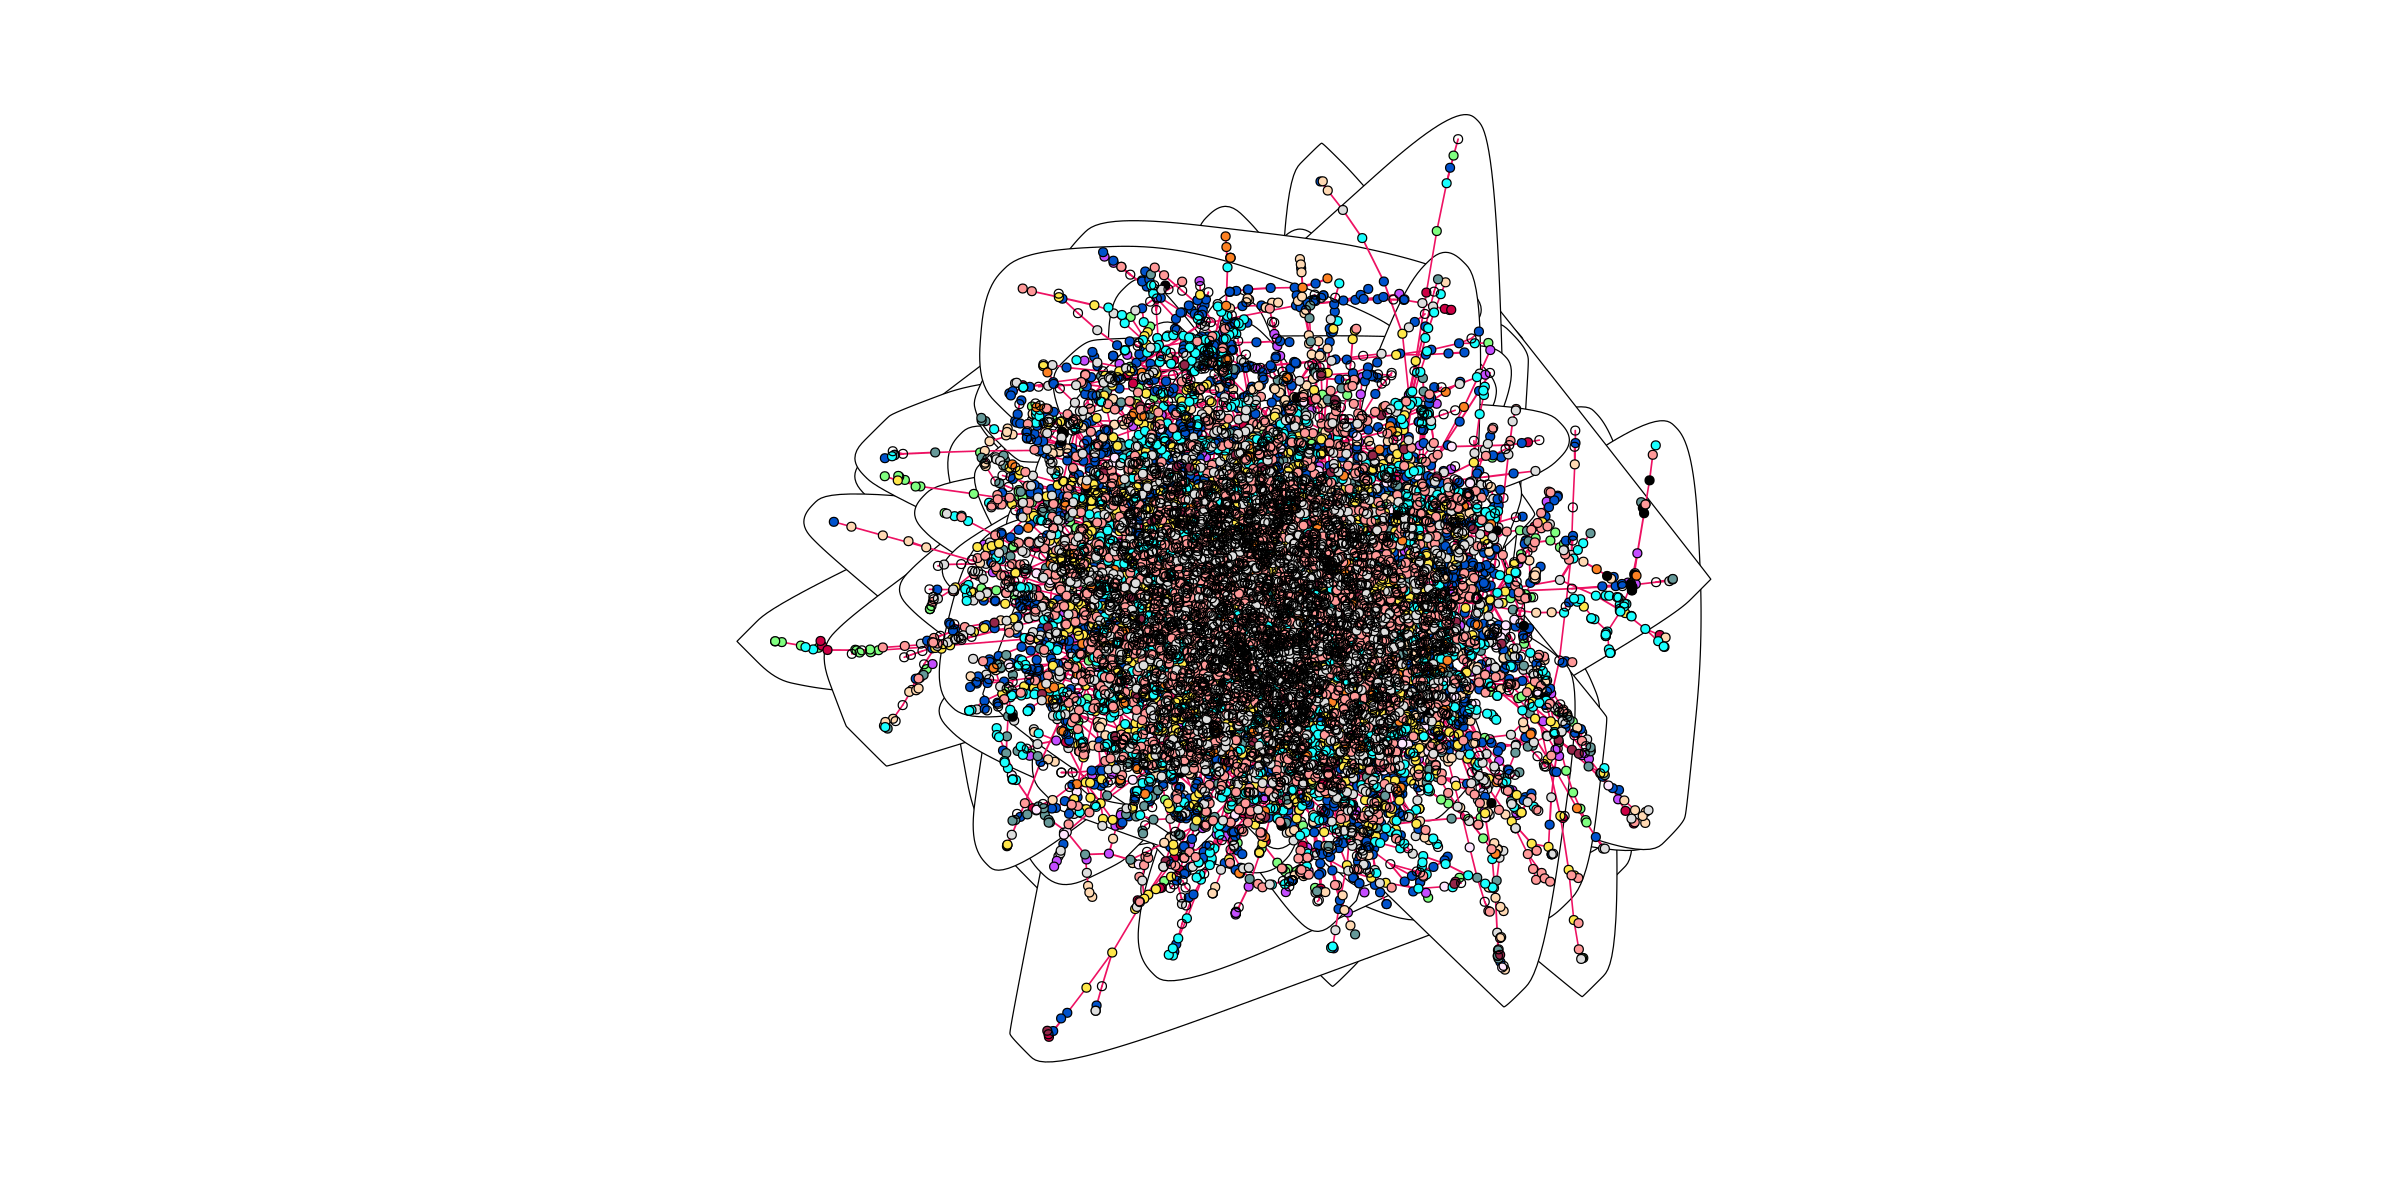

In [50]:
#setEPS()
#postscript("trans_network.eps")

plot(cb, main, col=V(main)$color, mark.border="black", mark.col=c("white"), edge.color=(E(main)$color),
    vertex.size=2, vertex.label=NA, edge.width=edgeweights, edge.curved=FALSE, vertex.shape="myimg",vertex.frame.width=1,vertex.frame.color="#000000",layout=layout_with_fr)


#dev.off()

In [51]:
grps <- split(V(main),cb$membership)
#grp <- unlist(subset(grps,mapply(`%in%`,5,grps)))
#df <- subset(get.data.frame(g),from %in% grp & to %in% grp)
grps

$`1`
+ 205/21347 vertices, named, from 3d1684c:
  [1]  Apicomplexa_ko:K01803                     
  [2]  Apicomplexa_ko:K03231                     
  [3]  Centroplasthelida_ko:K13448               
  [4]  Cercozoa_ko:K15013                        
  [5]  Cercozoa_ko:K15920                        
  [6]  Chlorophyta_ko:K01874                     
  [7]  Chlorophyta_ko:K02893                     
  [8]  Chlorophyta_ko:K14640                     
  [9]  Chlorophyta_ko:K17981                     
 [10]  Chlorophyta_ko:K21769                     
+ ... omitted several vertices

$`2`
+ 204/21347 vertices, named, from 3d1684c:
  [1]  Apusomonadida_ko:K04365                   
  [2]  Apusomonadida_ko:K04367                   
  [3]  Apusomonadida_ko:K08843                   
  [4]  Apusomonadida_ko:K17535                   
  [5]  Centroplasthelida_ko:K02915               
  [6]  Cercozoa_ko:K01114                        
  [7]  Cercozoa_ko:K05699                        
  [8]  Chlorophyta_ko:

In [52]:
main.nodes<-mst.nodes

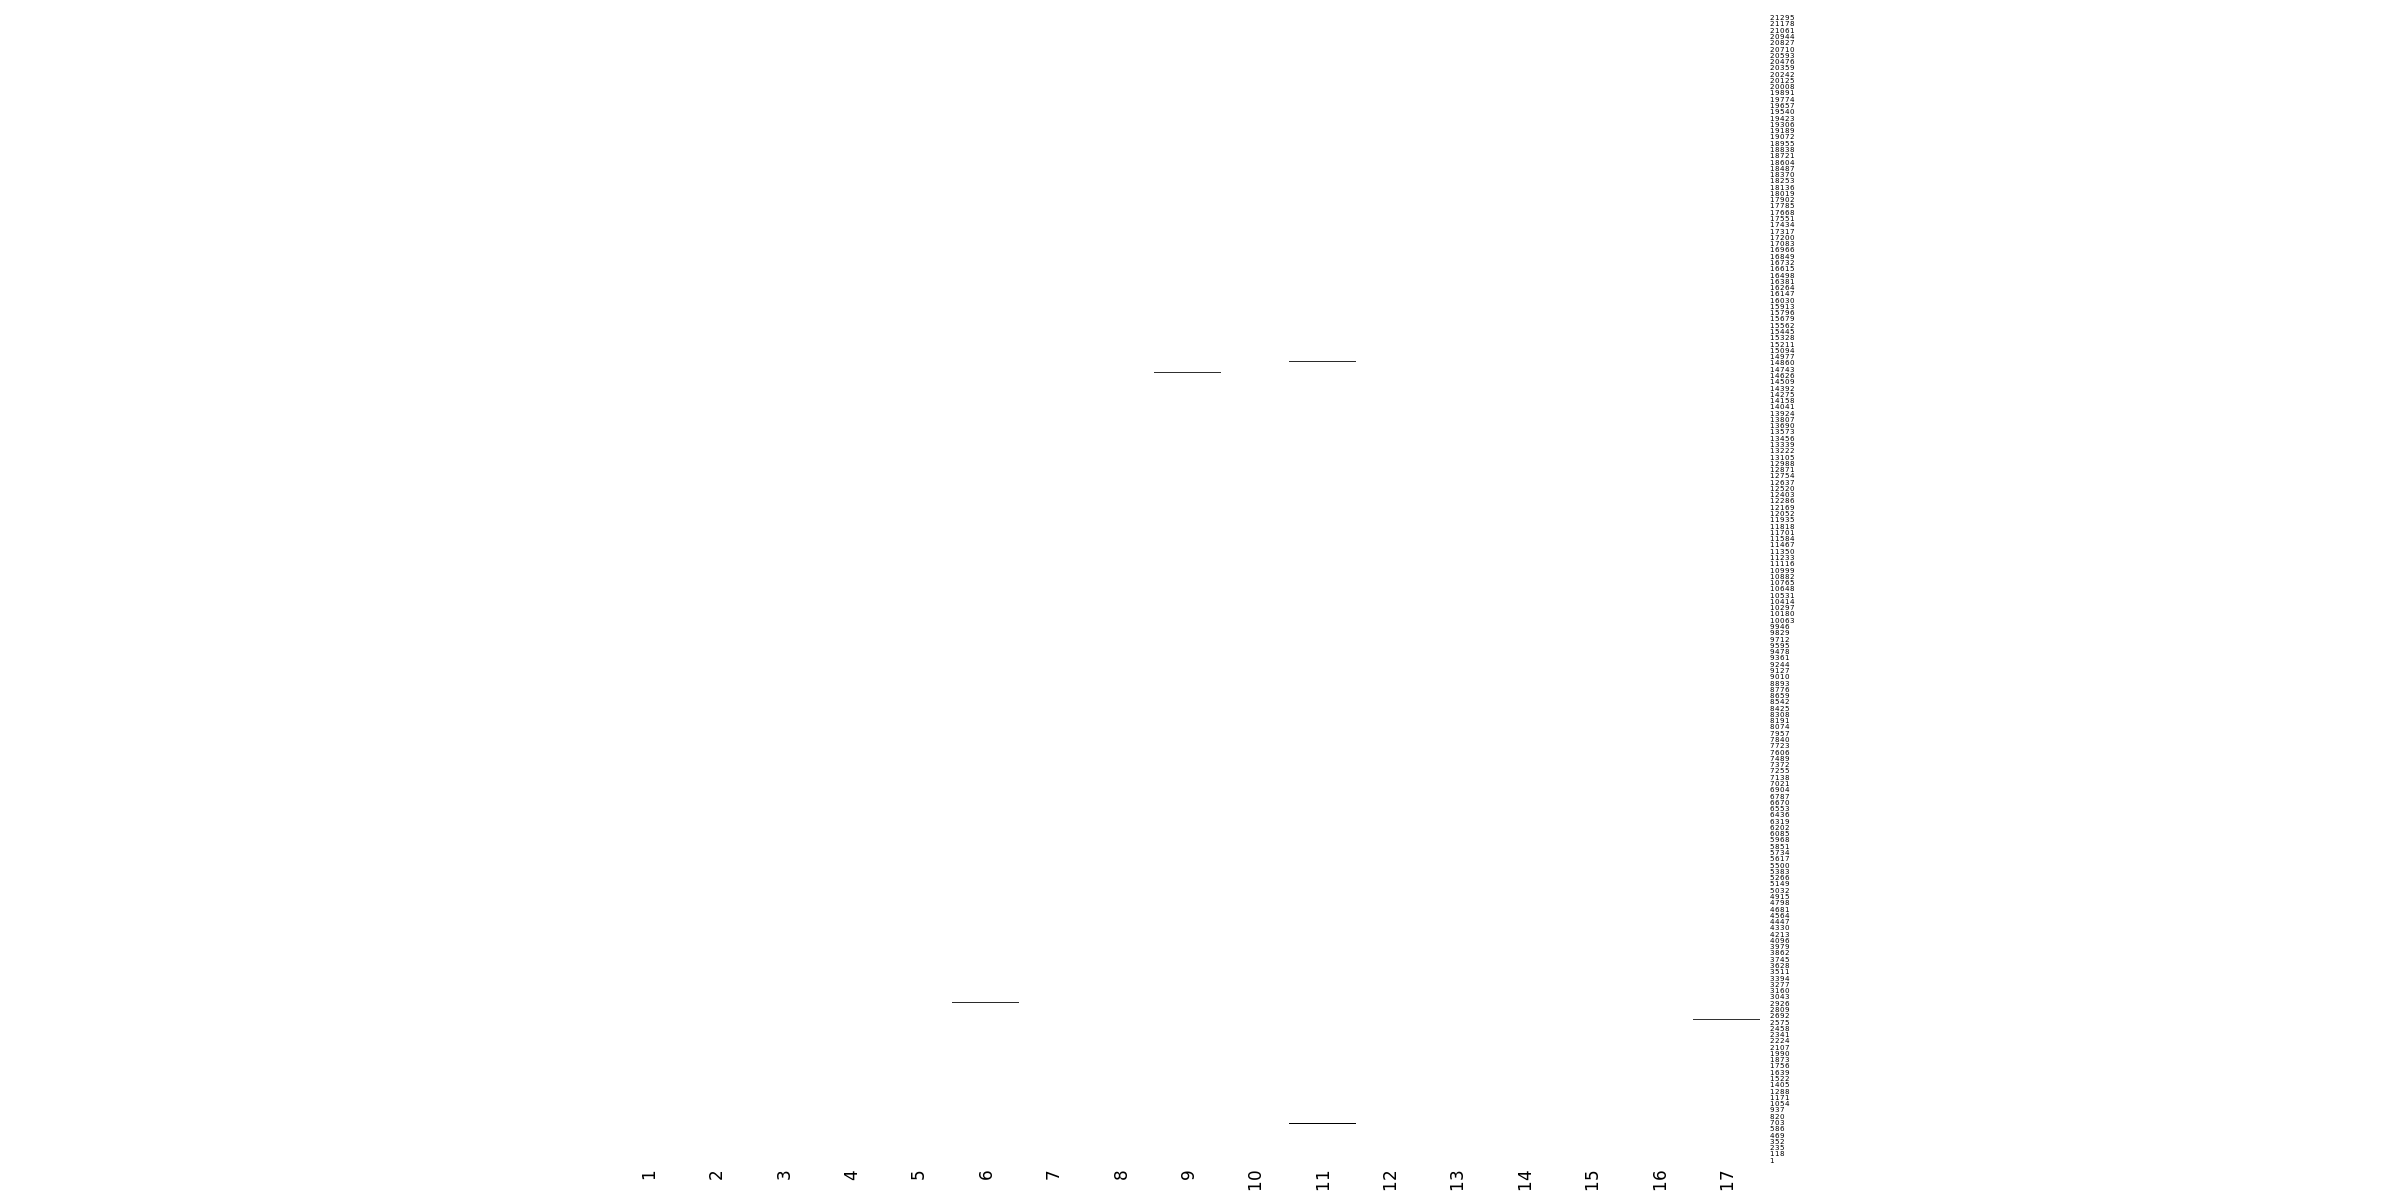

In [53]:
netm <- get.adjacency(main, attr="weight", sparse=F)

colnames(netm) <- V(main)$def

rownames(netm) <- V(main)$def



palf <- colorRampPalette(c("white", "black")) 

heatmap(netm[,17:1], Rowv = NA, Colv = NA, col = palf(100), 

        scale="none", margins=c(2,2) )

In [54]:
edge_density(main, loops=F)

[1] 9.368998e-05

In [55]:
ecount(main)/(vcount(main)*(vcount(main)-1))

[1] 4.684499e-05

In [56]:
reciprocity(main) #always 1 for an undirected graph

[1] 1

In [57]:
transitivity(main, type="global")  # net is treated as an undirected network

#transitivity(as.undirected(main, mode="collapse")) # same as above

#transitivity(main, type="local")

#triad_census(main) # for directed networks 

[1] 0

In [58]:
diameter(main, directed=F, weights=NA)

[1] 108

[1] 0.000000e+00 4.861105e-01 2.682813e-01 1.241392e-01 6.216330e-02
 [6] 2.848175e-02 1.677051e-02 7.026748e-03 3.653909e-03 1.545885e-03
[11] 7.963648e-04 4.684499e-04 1.873800e-04 1.405350e-04 9.368998e-05
[16] 4.684499e-05 4.684499e-05 0.000000e+00 4.684499e-05

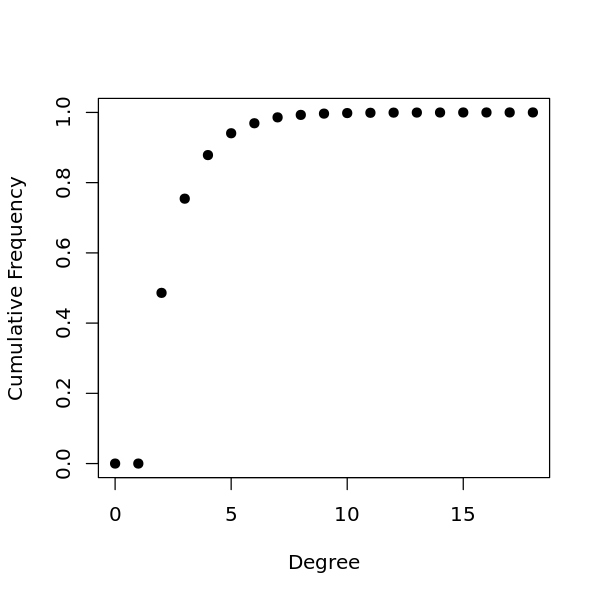

In [59]:
#From https://rstudio-pubs-static.s3.amazonaws.com/337696_c6b008e0766e46bebf1401bea67f7b10.html#degree-distribution
options(repr.plot.width = 5, repr.plot.height = 5)

deg <- degree(main, mode="all")
degree_distribution(main)

deg.dist <- degree_distribution(main, cumulative=T, mode="all")

plot( x=0:max(deg), y=1-deg.dist, pch=19, cex=1, col="black", 

      xlab="Degree", ylab="Cumulative Frequency")

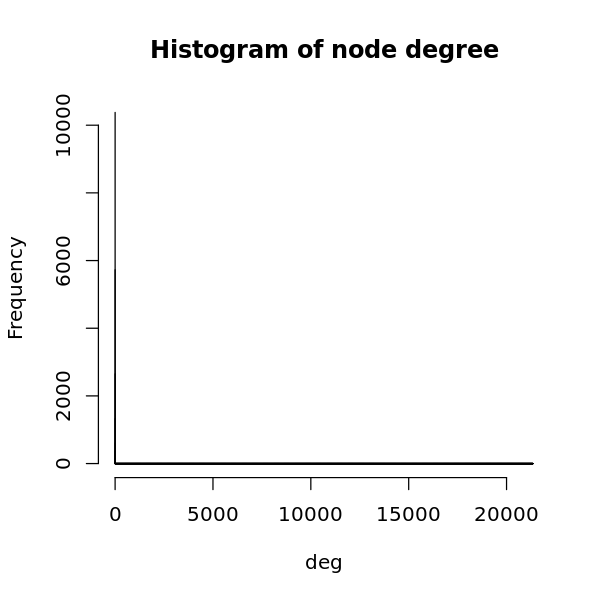

In [60]:
hist(deg, breaks=1:vcount(main)-1, main="Histogram of node degree")

In [61]:
closeness <- closeness(main)
degree <- degree(main)
betweenness <- betweenness(main)
eig <- evcent(main)$vector

centrality <- data.frame(row.names   = V(main)$name,
                         degree      = degree,
                         closeness   = closeness,
                         betweenness = betweenness,
                         eigenvector = eig)

centrality <- centrality[order(row.names(centrality)),]

max(centrality$degree)

[1] 18

In [62]:
degreemax<-17
sub<-centrality[centrality$degree %in% degreemax,]
sub #molecular chaperone HtpG - Dino

degree closeness betweenness eigenvector

In [63]:
class(cb)

[1] "communities"

In [64]:
length(cb)

[1] 159

In [65]:
membership(cb)

                         Aphelida_ko:K19882 
                                         38 
                      Apicomplexa_ko:K00012 
                                         40 
                      Apicomplexa_ko:K00024 
                                         64 
                      Apicomplexa_ko:K00025 
                                         64 
                      Apicomplexa_ko:K00026 
                                         64 
                      Apicomplexa_ko:K00297 
                                        136 
                      Apicomplexa_ko:K01174 
                                         20 
                      Apicomplexa_ko:K01412 
                                         86 
                      Apicomplexa_ko:K01803 
                                          1 
                      Apicomplexa_ko:K02183 
                                         43 
                      Apicomplexa_ko:K02882 
                                        110 
          

In [66]:
modularity(cb)

[1] 0.9859701

In [67]:
com <- cbind(V(main),cb$membership) #V(g) gets the number of vertices
com <- cbind(V(main)$name,cb$membership) #To get names if your vertices are labeled

In [68]:
df<-as.data.frame(com)
colnames(df)<-c('name','membership')
head(df)

name                   membership
1  Aphelida_ko:K19882    38        
2  Apicomplexa_ko:K00012 40        
3  Apicomplexa_ko:K00024 64        
4  Apicomplexa_ko:K00025 64        
5  Apicomplexa_ko:K00026 64        
6  Apicomplexa_ko:K00297 136

In [69]:
merge<-merge(df, main.nodes,by='name')

In [70]:
library(ggplot2)

In [71]:
merge3<-merge(df, main.nodes,by='name')

In [72]:
def<-read.tab('rest.kegg.jp.txt')
colnames(def)<-c('ko','def')
merge4<-merge(merge3, def, by='ko',all=T)
write.csv(merge4, 'membership_ko_taxa_network_trans.csv')

In [73]:
colnames(key)<-c('ko','def')
merge4<-merge(merge3, key, by='ko',all=T)
#write.csv(merge4,'transcripts_network_table.csv')

In [74]:
ye <- merge %>% count(membership, ko)
head(ye)
library(caroline)
sum<-groupBy(ye, by='membership',clmn=c('n'),aggregation='sum')
sum$membership<-rownames(sum)
colnames(sum)<-c('sum','membership')
count<-merge(sum, ye, by='membership')
count$ratio<-count$n/count$sum
head(count)

count$membership <- factor(count$membership, levels = (1:159), ordered=TRUE) 
levels(count$membership)

membership ko        n
1 1          ko:K00028 1
2 1          ko:K00053 1
3 1          ko:K00232 1
4 1          ko:K00249 1
5 1          ko:K00383 1
6 1          ko:K00505 1

membership sum ko        n ratio      
1 1          205 ko:K00028 1 0.004878049
2 1          205 ko:K00053 1 0.004878049
3 1          205 ko:K00232 1 0.004878049
4 1          205 ko:K00249 1 0.004878049
5 1          205 ko:K00383 1 0.004878049
6 1          205 ko:K00505 1 0.004878049

[1] "1"   "2"   "3"   "4"   "5"   "6"   "7"   "8"   "9"   "10"  "11"  "12" 
 [13] "13"  "14"  "15"  "16"  "17"  "18"  "19"  "20"  "21"  "22"  "23"  "24" 
 [25] "25"  "26"  "27"  "28"  "29"  "30"  "31"  "32"  "33"  "34"  "35"  "36" 
 [37] "37"  "38"  "39"  "40"  "41"  "42"  "43"  "44"  "45"  "46"  "47"  "48" 
 [49] "49"  "50"  "51"  "52"  "53"  "54"  "55"  "56"  "57"  "58"  "59"  "60" 
 [61] "61"  "62"  "63"  "64"  "65"  "66"  "67"  "68"  "69"  "70"  "71"  "72" 
 [73] "73"  "74"  "75"  "76"  "77"  "78"  "79"  "80"  "81"  "82"  "83"  "84" 
 [85] "85"  "86"  "87"  "88"  "89"  "90"  "91"  "92"  "93"  "94"  "95"  "96" 
 [97] "97"  "98"  "99"  "100" "101" "102" "103" "104" "105" "106" "107" "108"
[109] "109" "110" "111" "112" "113" "114" "115" "116" "117" "118" "119" "120"
[121] "121" "122" "123" "124" "125" "126" "127" "128" "129" "130" "131" "132"
[133] "133" "134" "135" "136" "137" "138" "139" "140" "141" "142" "143" "144"
[145] "145" "146" "147" "148" "149" "150" "151" "152" "153" "154" "155" "156"
[157] "157" "158" "159"

In [75]:
library(ggplot2)
options(repr.plot.width = 50, repr.plot.height = 5)
g<-ggplot(count, aes(x=membership, y=n)) + 
  geom_violin() + theme_bw() + ylab("Number of KO repeats") + geom_text(aes(label = sum, x = membership, y = 5), data = count, color = '#c90828') + stat_summary(fun.y=mean, geom="point", shape=16, size=2,color = '#c90828')

ggsave(file="trans_network_ko_repeats.eps", g, dpi = 600, width = 50, height = 5,limitsize=FALSE)

Warning message:
“The `fun.y` argument of `stat_summary()` is deprecated as of ggplot2 3.3.0.
ℹ Please use the `fun` argument instead.”


In [76]:
netm <- get.adjacency(main, attr="weight", sparse=F)
#colnames(netm) <- V(main)$membership
#rownames(netm) <- V(main)$membership
palf <- colorRampPalette(c("gold", "dark orange"))
#heatmap(netm, Rowv = NA, Colv = NA, col = palf(100),
#scale="none", margins=c(10,10) )

In [77]:
library(dplyr)

In [78]:
cb

IGRAPH clustering fast greedy, groups: 159, mod: 0.99
+ groups:
  $`1`
    [1] " Apicomplexa_ko:K01803"                     
    [2] " Apicomplexa_ko:K03231"                     
    [3] " Centroplasthelida_ko:K13448"               
    [4] " Cercozoa_ko:K15013"                        
    [5] " Cercozoa_ko:K15920"                        
    [6] " Chlorophyta_ko:K01874"                     
    [7] " Chlorophyta_ko:K02893"                     
    [8] " Chlorophyta_ko:K14640"                     
    [9] " Chlorophyta_ko:K17981"                     
  + ... omitted several groups/vertices

In [79]:
taxa <- merge %>% count(membership, taxa) #count each time a taxon appears in a membership cluster

In [80]:
taxa$membership <- factor(taxa$membership, levels = (1:159), ordered=TRUE)

In [81]:
levels(taxa$membership)

[1] "1"   "2"   "3"   "4"   "5"   "6"   "7"   "8"   "9"   "10"  "11"  "12" 
 [13] "13"  "14"  "15"  "16"  "17"  "18"  "19"  "20"  "21"  "22"  "23"  "24" 
 [25] "25"  "26"  "27"  "28"  "29"  "30"  "31"  "32"  "33"  "34"  "35"  "36" 
 [37] "37"  "38"  "39"  "40"  "41"  "42"  "43"  "44"  "45"  "46"  "47"  "48" 
 [49] "49"  "50"  "51"  "52"  "53"  "54"  "55"  "56"  "57"  "58"  "59"  "60" 
 [61] "61"  "62"  "63"  "64"  "65"  "66"  "67"  "68"  "69"  "70"  "71"  "72" 
 [73] "73"  "74"  "75"  "76"  "77"  "78"  "79"  "80"  "81"  "82"  "83"  "84" 
 [85] "85"  "86"  "87"  "88"  "89"  "90"  "91"  "92"  "93"  "94"  "95"  "96" 
 [97] "97"  "98"  "99"  "100" "101" "102" "103" "104" "105" "106" "107" "108"
[109] "109" "110" "111" "112" "113" "114" "115" "116" "117" "118" "119" "120"
[121] "121" "122" "123" "124" "125" "126" "127" "128" "129" "130" "131" "132"
[133] "133" "134" "135" "136" "137" "138" "139" "140" "141" "142" "143" "144"
[145] "145" "146" "147" "148" "149" "150" "151" "152" "153" "154" "155" "156"
[157] "157" "158" "159"

In [82]:
library(ggplot2)

In [83]:
cols <- c(' Chlorophyta'='#80ff80', ' Ciliophora'='#c44dff', ' Collodictyonidae'='#ccccff', ' Cryptophyta'='#cc0044', ' Dinophyta'='#0052cc', ' Discoba'='#ffd9b3',' Foraminifera'='#669999',' Fungi'='#FFE6FF',' Haptophyta'='#FFE74A', ' Lobosa'='#000000',' Marine_stramenopiles_MASTs group'='#9c7b11',' Metazoa'='#1affff',' Picozoa'='#fc8123',' Radiolaria'='#942649',' Stramenopiles'='#ff9999',' Ancyromonadidae'='#dddddd', ' Apicomplexa'='#dddddd',' Centroplasthelida'='#dddddd',' Cercozoa'='#dddddd',' Choanoflagellata'='#dddddd',' Choanoflagellida'='#dddddd',' Colpodellida'='#dddddd',' Colponemidia'='#dddddd',' Corallochytrium'='#dddddd',' Endomyxa'='#dddddd',' Evosea'='#dddddd',' Filasterea'='#dddddd',' Glaucocystophyta'='#dddddd',' Ichthyosporea'='#dddddd',' Loukozoa'='#dddddd',' Mantamonadidae'='#dddddd',' Marine'='#dddddd',' Oomycota'='#dddddd',' Perkinsea'='#dddddd',' Prasinodermophyta'='#dddddd',' Rhodelphida'='#dddddd',' Rhodophyta'='#dddddd',' Squirmida'='#dddddd',' Streptophyta'='#dddddd',' Telonemia'='#dddddd',' Tubulinea'='#dddddd')

#cols <- c('#FFFFFE', '#CCCCFF', '#2e436b', "#999966", "#80FF80", "#FFA319", '#47d1d1',"#C44DFF","#E6E600","#CC0044","#0052CC","#FFD9B3",'#fcf1f0','#c98f22',"#669999", "#FFE6FF","#993D00",'#73e600',"#FFE74A",'#40057a',"#000000", '#ac39ac','#1affff','#147087',"#408000", '#bb80bb','#942649',"#FF0000",'#bfd119','#ff9999',"#bbffdd", '#ff59dd',"#9ca5a6")

In [84]:
options(repr.plot.width = 40, repr.plot.height = 7)

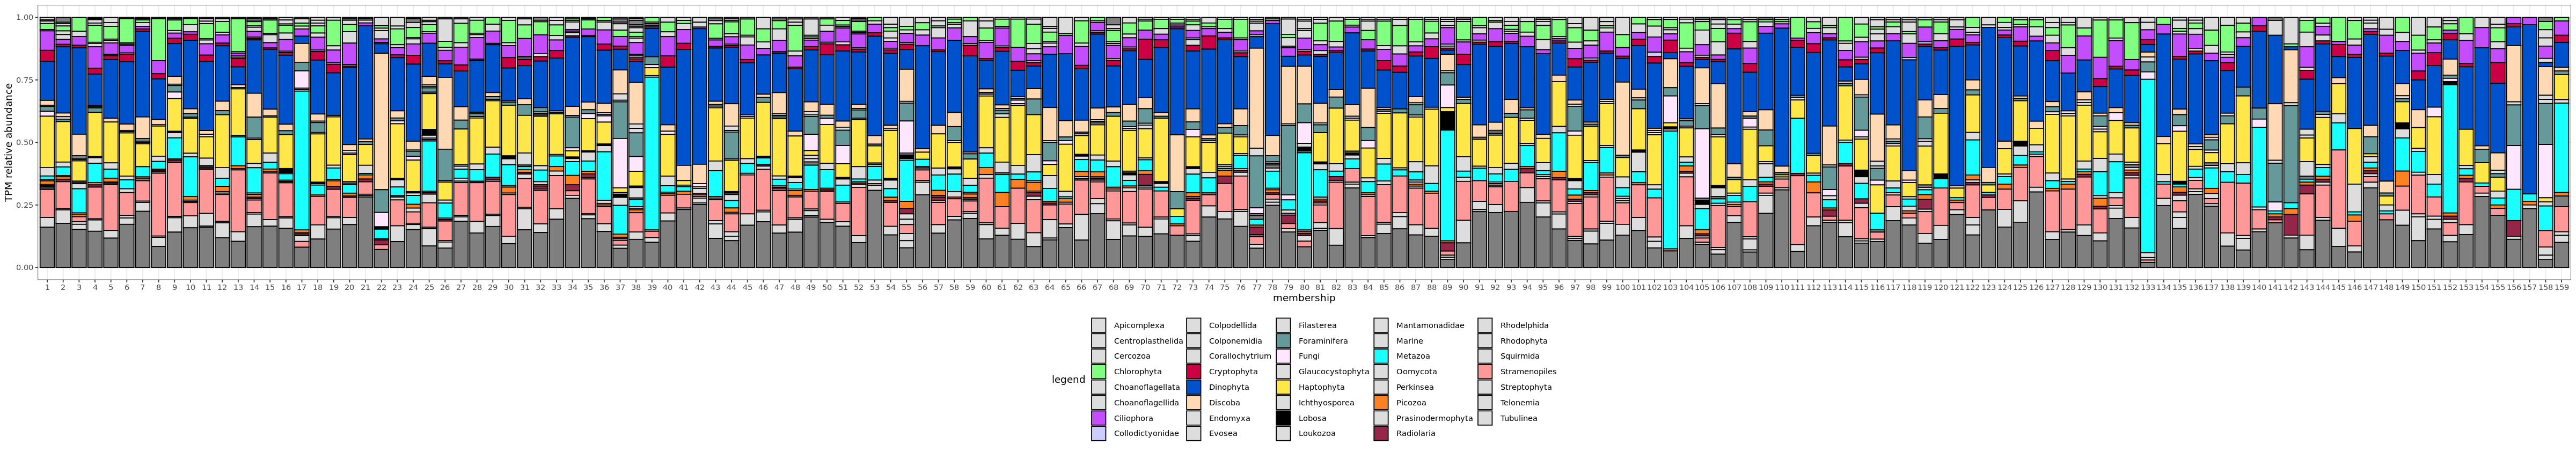

In [85]:
ggplot(taxa, aes(fill=taxa, y=n, x=membership)) + 
    geom_bar(position="fill", stat="identity",colour="black") + theme_bw() + ylab("TPM relative abundance") + theme(legend.position = "bottom") + scale_fill_manual("legend",values=cols)
#ggsave(file="trans_network_taxa.eps", g, dpi = 600, width = 40, height = 7)

In [86]:
ko<-main.nodes$ko

In [87]:
ko2<-unique(ko)

In [88]:
ko2brite<-read.csv('ko2brite.csv',header=TRUE, stringsAsFactors=FALSE, fileEncoding="latin1") #"Enzyme" category not included - too broad

In [89]:
colnames(ko2brite)<-c('BRITE','ko','x','x1','x2')
merge2<-merge(ko2brite, merge, by='ko',all=T) #If KO has two BRITE categories, each BRITE gets 1 KO count
test1<-merge2[!is.na(merge2$name), ] #Remove KO/BRITE rows without matches to dataset
merge2<-test1

In [90]:
func <- merge2 %>% count(membership, BRITE) #count each time a BRITE category appears in a membership cluster

In [91]:
options(repr.plot.width = 30, repr.plot.height = 7.5)

In [92]:
kegg<-c('#FA0404','#FB5F5F','#FB9F9F','#BD4646','#F2670D','#D67637','#B85A1C','#984610','#F6BA0E','#DBB340','#AFA619','#E6DA1E','#FBEC06','#CEFB06','#BFE125','#3CFA04','#4EC62A','#37D782','#1DB062','#2DF7BD','#16B98A','#16E6E3','#19BBB9','#19A0BB','#0B6D81','#0c1a63','#1F8ACB','#0A6FF7','#043BF7','#2E08C8','#5643A5','#9084C4','#9D24EB','#B96BEB','#F028E3','#D87AD2','#F93875','#f296b9','#f0dfe7','#FFFFFE','#000000','#000000','#000000')

In [93]:
KO<-c('ko01007 Amino acid related enzymes','ko01009 Protein phosphatases and associated proteins','ko01002 Peptidases and inhibitors','ko01001 Protein kinases','ko04031 GTP-binding proteins','ko03012 Translation factors','ko03011 Ribosome','ko03009 Ribosome biogenesis','ko03019 Messenger RNA biogenesis','ko03036 Chromosome and associated proteins','ko03021 Transcription machinery','ko03016 Transfer RNA biogenesisæ','ko03400 DNA repair and recombination proteins','ko03032 DNA replication proteins','ko03000 Transcription factors','ko00194 Photosynthesis proteinsæ','ko03029 Mitochondrial biogenesis','ko04040 Ion channels','ko02000 Transporters','ko04090 CD molecules','ko04131 Membrane trafficking','ko02044 Secretion system','ko04030 G protein-coupled receptors','ko01003 Glycosyltransferases','ko00536 Glycosaminoglycan binding proteins','ko01004 Lipid biosynthesis proteins','ko04091 Lectins','ko00537 Glycosylphosphatidylinositol (GPI)-anchored proteins','ko01008 Polyketide biosynthesis proteins','ko03051 Proteasome','ko04121 Ubiquitin system','ko03041 Spliceosome','ko03110 Chaperones and folding catalysts','ko04147 Exosome','ko04515 Cell adhesion molecules','ko02035 Bacterial motility proteinsæ','ko04054 Pattern recognition receptors','ko00199 Cytochrome P450','ko04990 Domain-containing proteins not elsewhere classified','ko04812 Cytoskeleton proteins','Other')

In [94]:
func$BRITE <- factor(func$BRITE, levels = KO, ordered=TRUE)

In [95]:
func$membership <- factor(func$membership, levels = (1:159), ordered=TRUE)

In [96]:
library(ggplot2)

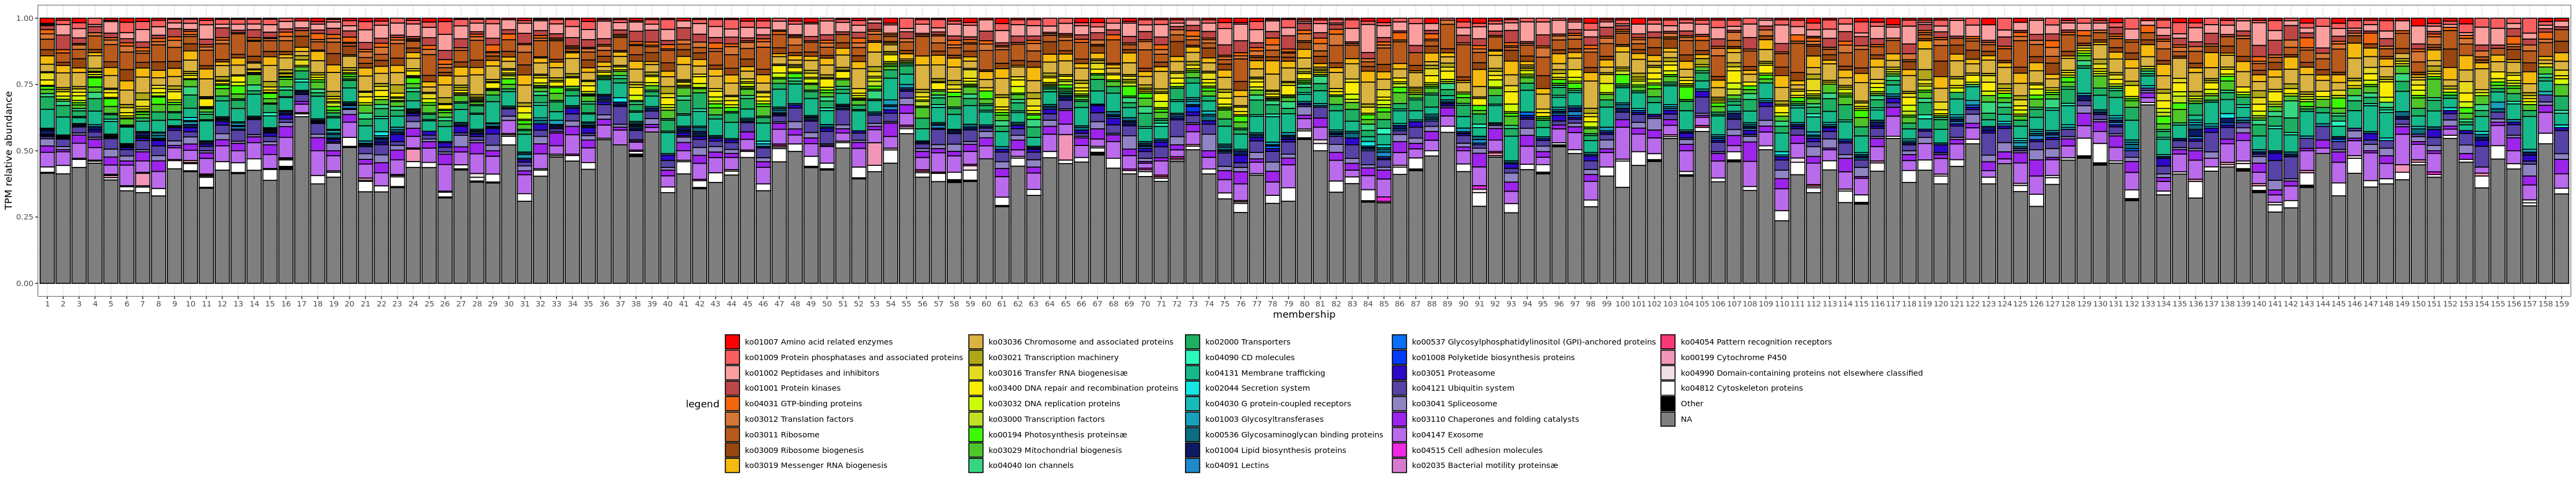

In [97]:
options(repr.plot.width = 40, repr.plot.height = 7.5)
ggplot(func, aes(fill=BRITE, y=n, x=membership)) + 
    geom_bar(position="fill", stat="identity", colour="black") + theme_bw() + ylab("TPM relative abundance") + theme(legend.position = "bottom") + scale_fill_manual("legend",values=kegg)
#ggsave(file="trans_network_kegg_wide4caption.eps", g, dpi = 600, width = 40, height = 7.5)

In [98]:
library(tmod)

For tmod user guide, type `vignette("tmod")`



In [128]:
head(com)

[,1]                   [,2]
[1,]  Aphelida_ko:K19882    38  
[2,]  Apicomplexa_ko:K00012 40  
[3,]  Apicomplexa_ko:K00024 64  
[4,]  Apicomplexa_ko:K00025 64  
[5,]  Apicomplexa_ko:K00026 64  
[6,]  Apicomplexa_ko:K00297 136

In [100]:
membership<-as.data.frame(com)

In [101]:
colnames(membership)<-c('gene_id','geneset_id')

In [102]:
res <- makeTmodFromDataFrame(membership, feature_col="gene_id", module_col="geneset_id")

unlisting m2g

making Tmod



In [103]:
eig<-eigengene(d, rownames(d), res)

In [104]:
cor_eig<-cor(eig)

In [105]:
library(ggcorrplot)

In [106]:
p.mat <- ggcorrplot::cor_pmat(cor_eig)

In [129]:
options(repr.plot.width = 10, repr.plot.height = 9)

In [130]:
ggcorrplot(cor_eig,hc.order=TRUE,colors = c("#0FFF50", "#FFFFFE", "#5F03FB"),outline="black",p.mat=p.mat, sig.level=0.05)

ERROR: Error in p.mat[ord, ord]: subscript out of bounds


In [109]:
t_eig<-t(eig)
t_eig<-as.data.frame(t_eig)

In [110]:
t_eig$ID<-rownames(t_eig)
t_eig<-as.data.frame(t_eig)

In [111]:
cors<-read.csv('correlations.csv')

In [112]:
library(ggcorrplot)

In [113]:
options(repr.plot.width = 20, repr.plot.height = 20)

In [114]:
cors<-cors[,-1]

In [115]:
cors<-cors[with(cors, order(ID)),] #sort by ID

In [116]:
t_eig<-t_eig[with(t_eig, order(ID)),] #sort by ID

In [117]:
t_eig<-t_eig[(t_eig$ID %in% cors$ID),] #remove rows not shared in other df

In [118]:
cors<-cors[(cors$ID %in% t_eig$ID),] #remove rows not shared in other df

In [119]:
t_eig<-t_eig[,-160]

In [120]:
cors<-cors[,-2]

In [121]:
colnames(t_eig)<-as.factor(colnames(t_eig))

In [122]:
library(psych)
correlation<-corr.test(x=t_eig,y=cors, method=c("spearman"))


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




In [123]:
p.mat <- correlation$p

In [132]:
options(repr.plot.width = 40, repr.plot.height = 7)

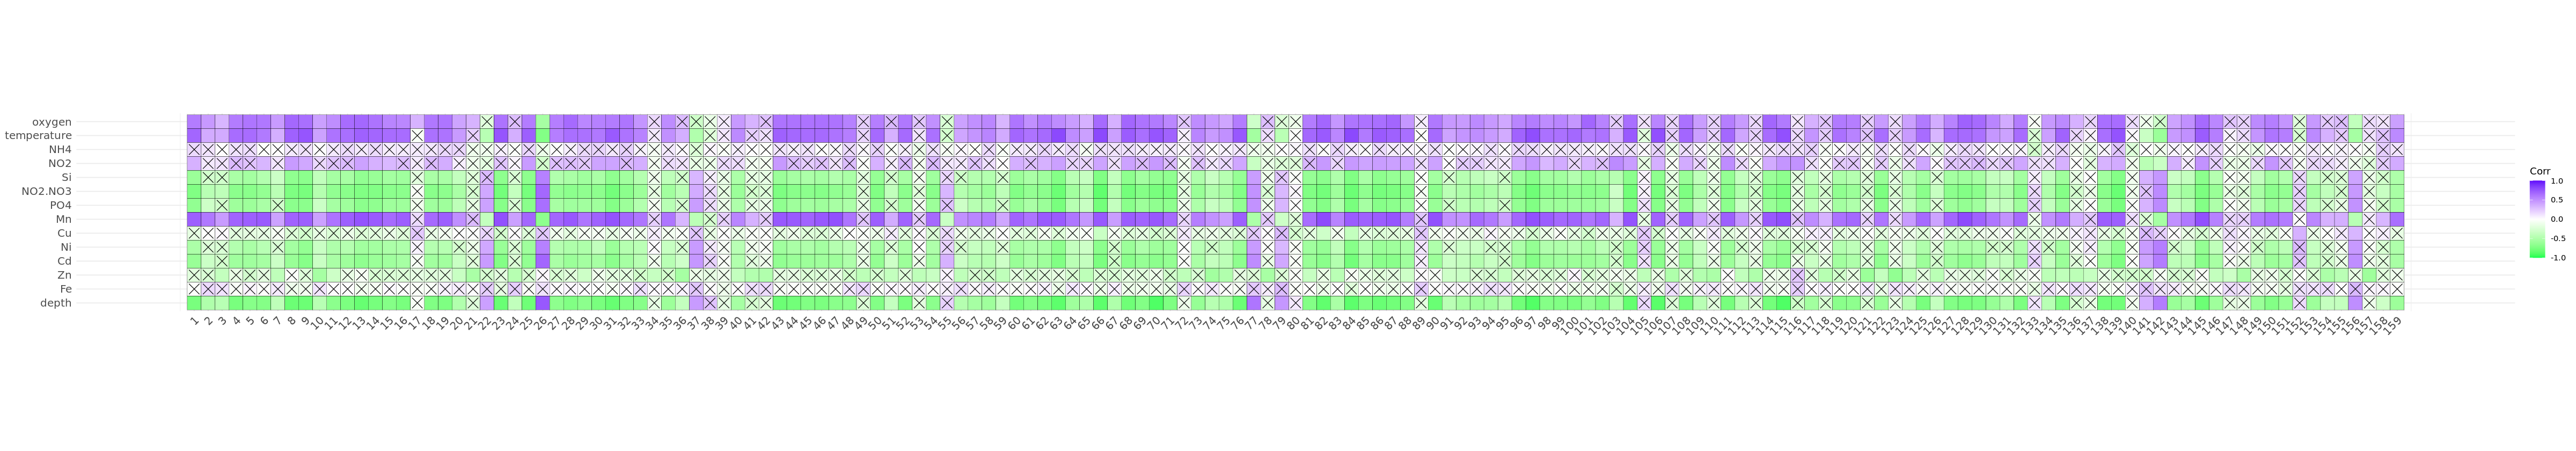

In [134]:
ggcorrplot(correlation$r,colors = c("#0FFF50", "#FFFFFE", "#5F03FB"),outline="black", p.mat = p.mat, sig.level=0.05) + ggplot2::scale_x_continuous(breaks = seq(1, 159, 1))
#ggsave(file="trans_network_correlation.eps", g, dpi = 600, width = 40, height = 7)

In [126]:
main

IGRAPH 3d1684c UNW- 21347 21346 -- 
+ attr: name (v/c), vertex.frame.color (v/c), color (v/c), weight
| (e/n), color (e/c)
+ edges from 3d1684c (vertex names):
 [1]  Aphelida_ko:K19882   -- Collodictyonidae_ko:K13448
 [2]  Aphelida_ko:K19882   -- Discoba_ko:K15408         
 [3]  Aphelida_ko:K19882   -- Endomyxa_ko:K11655        
 [4]  Aphelida_ko:K19882   -- Fungi_ko:K01469           
 [5]  Aphelida_ko:K19882   -- Metazoa_ko:K12193         
 [6]  Apicomplexa_ko:K00012-- Haptophyta_ko:K19680      
 [7]  Apicomplexa_ko:K00024-- Stramenopiles_X_ko:K18995 
+ ... omitted several edges

In [ ]:
cb